# <span style="color:blue">Esercitazione 1</span>

### Esercizio 01.1
Nel primo esercizio la richiesta era quella di testare il generatore di numeri pseudo-casuali fornitoci attraverso un analisi delle caratteristiche principali (media e varianza dei numeri estratti) ed un test del $\chi^2$.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as pl

pl.rc('text', usetex=True)
pl.rc('font', family='serif')

### Esercizio 01.2
Qui la richiesta era quella di verificare praticamente il range di validità del *Teorema del Limite Centrale* (CLT).\
In particolare ho qui estratto e mediato per $M=10^4$ volte $N=1,2,10,100$ numeri casuali a partire da:

1. una distribuzione uniforme in $[0,1]$
2. una distribuzione esponenziale $p(x) = \lambda \ e^{-\lambda x}$ con $\lambda = 1$
3. una distribuzione di Cauchy-Lorentz $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ con $\mu=0$ e $\Gamma=1$

Nei primi due casi ho due distribuzioni con media e varianza finite, e quindi entrambe soddisfano le ipotesi del CLT, mentre per la lorentziana $\sigma^2=+\infty$, ed è essa stessa ad agire come bacino di attrazione. Per questi motivi le medie con $N=100$ sono state fittate nei primi due casi con una gaussiana appropriata (stessa media delle due distribuzioni di partenza, varianza ridotta di un fattore $100$) e per la lorentziana con la distribuzione stessa.

Per generare numeri pseudo-casuali nelle forme sopra descritte ho utilizzato il metodo dell'inversa della cumulativa\
<font color="red">**DA CONCLUDERE, PER LO MENO METTERE LA FORMULA**</font>

In [2]:
from scipy.stats import norm, cauchy
import math

M=int(1e4)                   # Number of realizations of S(N)
names='1','2','10','100'

def vlines(mu,sigma):
    pl.axvline(x=mu,color='k',linewidth=0.5)   # black line for central Gaussian value form CLT
    pl.axvline(x=mu+sigma,color='k',linewidth=0.5,linestyle='--')   # 1_sigma deviation
    pl.axvline(x=mu-sigma,color='k',linewidth=0.5,linestyle='--')

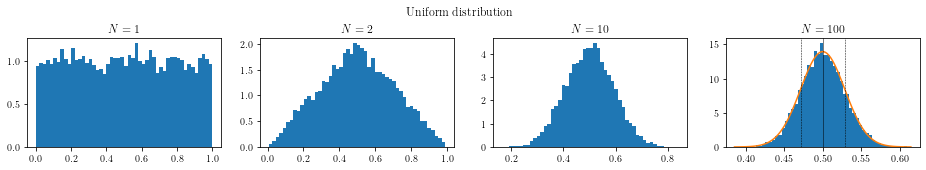

Gaussian fit: mu =  0.5001143674999999    sigma =  0.028637423954983168
100*var - 1/12 =  -0.0013231282555889595


In [16]:
Unif=np.genfromtxt('res02.out',max_rows=M,names=names)
mu,sigma = np.mean(Unif['100']),np.sqrt(np.var(Unif['100']))
x=np.linspace(mu-4*sigma,mu+4*sigma,100)

pl.figure('fig1',figsize=(16,2))
for i in range(4):
    pl.subplot(1,4,i+1)
    pl.hist(Unif[names[i]],bins=50,density=True) # normalized hist to produce a probability distribution and graphically check Guassian convergence
    pl.title(r'$N='+names[i]+'$')
    if i==3: pl.plot(x,norm.pdf(x,mu,sigma)); vlines(mu,sigma)      # plotting Gaussian fitting function

pl.suptitle('Uniform distribution',y=1.1)
pl.show()

print("Gaussian fit: mu = ",mu,"   sigma = ",sigma)
print("100*var - 1/12 = ",100*sigma**2-1/12)

Qui risulta evidente il risultato descritto dal CLT, per cui per $N$ sufficientemente grande (qui, ma anche nel seguito, $N=100$ risulta sufficiente) la distribuzione della media di $N$ variabili casuali indipendenti ed estratte da distribuzioni identiche tende nello spazio delle distribuzioni di probabilità verso la distribuzione gaussiana centrata in $\mu$ e con varianza $\sigma^2/N$, dove $\mu$ e $\sigma^2$ sono rispettivmente la media e la varianza della generica distribuzione di partenza (in questo caso specifico $\mu=0.5$ e $\sigma^2=1/12$).\
Nell'ultimo grafico la curva arancione rappresenta proprio la predizione del CLT, mentre le linee nere verticali evidenziano il valor medio atteso e la deviazione a $1\sigma$ attesi dal teorema.

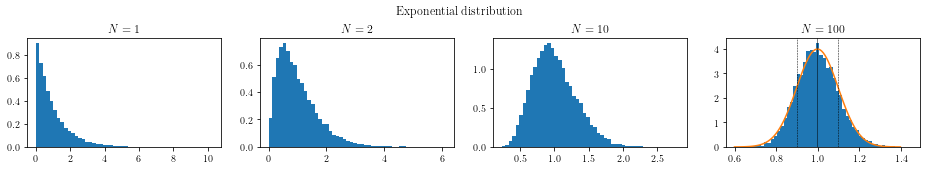

Gaussian fit: mu =  0.9984027522000001    sigma =  0.09980796693651162
100*var - 1 =  -0.0038369736000203325


In [17]:
Exp=np.genfromtxt('res02.out',skip_header=M+2,max_rows=M,names='1,2,10,100')
mu,sigma = np.mean(Exp['100']),np.sqrt(np.var(Exp['100']))
x=np.linspace(mu-4*sigma,mu+4*sigma,100)

pl.figure('fig2',figsize=(16,2))
for i in range(4):
    pl.subplot(1,4,i+1)
    pl.hist(Exp[names[i]],bins=50,density=True)
    pl.title(r'$N='+names[i]+'$')
    if i==3: pl.plot(x,norm.pdf(x,mu,sigma)); vlines(mu,sigma)

pl.suptitle('Exponential distribution',y=1.1)
pl.show()

print("Gaussian fit: mu = ",mu,"   sigma = ",sigma)
print("100*var - 1 = ",100*sigma**2-1)

I commenti sono gli stessi della figura precedente, a parte il fatto che qui $\mu=1/\lambda=1$ e $\sigma^2=1/\lambda^2=1$

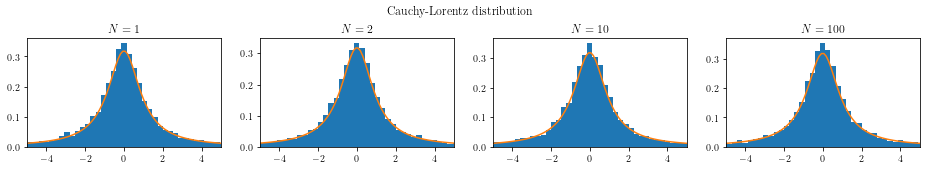

In [5]:
Lor=np.genfromtxt('res02.out',skip_header=2*(M+2),max_rows=M,names='0,1,2,3')
mu,Gamma=0,1   # the cauchy distribution is stable so its parameters are unchanged (CLT hypotesis are not verified, infinite variance)
x=np.linspace(mu-6*Gamma,mu+6*Gamma,100)

pl.figure('fig3',figsize=(16,2))
for i in range(4):
    pl.subplot(1,4,i+1)
    pl.hist(Lor[str(i)],bins=75,range=(-10,10),density=True)
    pl.plot(x,cauchy.pdf(x,mu,Gamma))
    pl.xlim(left=-5,right=5)
    pl.title(r'$N='+names[i]+'$')

pl.suptitle('Cauchy-Lorentz distribution',y=1.1)
pl.show()

Qui il CLT non è applicabile: la distribuzione di Cauchy-Lorentz ha varianza infinita e non rispetta dunque le ipotesi del teorema. La distribuzione è inoltre stabile (cioè è invariante a meno di fattori scalari sotto l'operazione di convoluzione), e quindi è essa stessa il proprio attrattore nello spazio delle distribuzioni: per ogni valore di $N$ scelto la distribuzione seguita dalla media sarà sempre la distribuzione di partenza stessa. Le curve arancioni nei grafici rappresentano proprio questa curva lorentziana.

### Esercizio 01.3